In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_csv_df = pd.read_csv(mouse_drug_data_to_load)
drug_csv_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_csv_df, drug_csv_df, on='Mouse ID', how='inner')

# Display the data table for preview
combined_df.head(5)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_group = combined_df.groupby(['Drug','Timepoint'])
mean_tumor_volume = drug_timepoint_group['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)
# Preview DataFrame
mean_tumor_volume_df.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_timepoint_group = combined_df.groupby(['Drug','Timepoint'])
stderr_tumor_volume = drug_timepoint_group['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
stderr_tumor_volume_df =pd.DataFrame(stderr_tumor_volume) 
# Preview DataFrame
stderr_tumor_volume_df.head(5)



# mean_tumor_volume_df.sem(axis = 1, skipna = True).T

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames
stderr_tumor_volume_munged_df = stderr_tumor_volume_df.T
stderr_tumor_volume_munged_df.head(5)
# Preview that Reformatting worked



Drug               Capomulin                                          \
Timepoint                 0         5         10        15        20   
Tumor Volume (mm3)       0.0  0.448593  0.702684  0.838617  0.909731   

Drug                                                                 ...  \
Timepoint                 25       30        35        40        45  ...   
Tumor Volume (mm3)  0.881642  0.93446  1.052241  1.223608  1.223977  ...   

Drug               Zoniferol                                                   \
Timepoint                 0        5         10        15        20        25   
Tumor Volume (mm3)       0.0  0.18895  0.263949  0.370544  0.533182  0.602513   

Drug                                                        
Timepoint                 30        35        40        45  
Tumor Volume (mm3)  0.800043  0.881426  0.998515  1.003576  

[1 rows x 100 columns]

In [8]:
mean_tumor_volume_munged_df = mean_tumor_volume_df.T
mean_tumor_volume_munged_df.head(5)

Drug               Capomulin                                              \
Timepoint                 0          5          10         15         20   
Tumor Volume (mm3)      45.0  44.266086  43.084291  42.064317  40.716325   

Drug                                                                       \
Timepoint                  25         30         35         40         45   
Tumor Volume (mm3)  39.939528  38.769339  37.816839  36.958001  36.236114   

Drug                ... Zoniferol                                              \
Timepoint           ...        0          5          10         15         20   
Tumor Volume (mm3)  ...      45.0  46.851818  48.689881  50.779059  53.170334   

Drug                                                                       
Timepoint                  25         30         35         40         45  
Tumor Volume (mm3)  55.432935  57.713531  60.089372  62.916692  65.960888  

[1 rows x 100 columns]

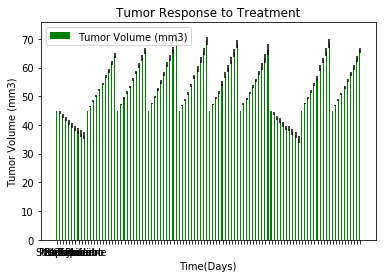

In [9]:

ind = np.arange(len(mean_tumor_volume))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, mean_tumor_volume, width, yerr=stderr_tumor_volume,
                label='Tumor Volume (mm3)' ,color = 'green')


# ax.errorbar(np.arange(len(mean_tumor_volume)), mean_tumor_volume, yerr=stderr_tumor_volume, fmt='o')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title('Tumor Response to Treatment')
ax.set_xticks([value for value in ind])
ax.set_xticklabels(tuple(combined_df.Drug.unique()))
ax.legend()


plt.show()


# Save the Figure



In [10]:
# Show the Figure



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_timepoint_group = combined_df.groupby(['Drug','Timepoint'])
mean_met_site_data = drug_timepoint_group['Metastatic Sites'].mean()
# Convert to DataFrame
mean_met_site_data_df = pd.DataFrame(mean_met_site_data)
# Preview DataFrame
mean_met_site_data_df.head(5)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_timepoint_group = combined_df.groupby(['Drug','Timepoint'])
stderr_met_site_data = drug_timepoint_group['Metastatic Sites'].sem()
stderr_met_site_data_df =  pd.DataFrame(stderr_met_site_data) 
# Convert to DataFrame

# Preview DataFrame
stderr_met_site_data_df.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames
stderr_met_site_munged_df = stderr_met_site_data_df.T
stderr_met_site_munged_df.head(5)
# Preview that Reformatting worked


Drug             Capomulin                                                    \
Timepoint               0         5         10        15        20        25   
Metastatic Sites       0.0  0.074833  0.125433  0.132048  0.161621  0.181818   

Drug                                                     ... Zoniferol  \
Timepoint               30        35       40        45  ...        0    
Metastatic Sites  0.172944  0.169496  0.17561  0.202591  ...       0.0   

Drug                                                                          \
Timepoint               5         10        15        20        25        30   
Metastatic Sites  0.077709  0.109109  0.111677  0.166378  0.236621  0.248168   

Drug                                          
Timepoint               35        40      45  
Metastatic Sites  0.285714  0.299791  0.2864  

[1 rows x 100 columns]

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_munged_df = mean_met_site_data_df.T
mean_met_site_munged_df.head(5)
# Preview that Reformatting worked

Drug             Capomulin                                                   \
Timepoint               0     5     10     15        20        25        30   
Metastatic Sites       0.0  0.16  0.32  0.375  0.652174  0.818182  1.090909   

Drug                                           ... Zoniferol                 \
Timepoint               35        40       45  ...        0         5    10   
Metastatic Sites  1.181818  1.380952  1.47619  ...       0.0  0.166667  0.5   

Drug                                                                        \
Timepoint               15        20      25        30        35        40   
Metastatic Sites  0.809524  1.294118  1.6875  1.933333  2.285714  2.785714   

Drug                        
Timepoint               45  
Metastatic Sites  3.071429  

[1 rows x 100 columns]

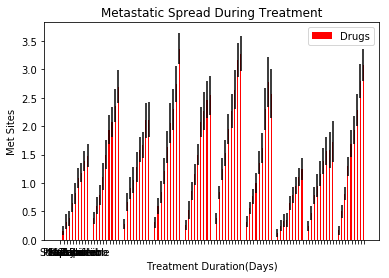

In [16]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure



ind = np.arange(len(mean_met_site_data))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, mean_met_site_data, width, yerr=stderr_met_site_data,
                label='Drugs' ,color = 'r')


# ax.errorbar(np.arange(len(mean_tumor_volume)), mean_tumor_volume, yerr=stderr_tumor_volume, fmt='o')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Met Sites")
ax.set_title('Metastatic Spread During Treatment')
ax.set_xticks([value for value in ind])
ax.set_xticklabels(tuple(combined_df.Drug.unique()))
ax.legend()


plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_timepoint_group = combined_df.groupby(['Drug','Timepoint'])
mean_survival_rates_data = drug_timepoint_group['Mouse ID'].count()
# Convert to DataFrame
mean_survival_rates_data_df = pd.DataFrame(mean_survival_rates_data)
# Preview DataFrame
mean_survival_rates_data_df.head(5)


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
mean_survival_rates_data_munged_df = mean_survival_rates_data_df.T

# Preview the Data Frame
mean_survival_rates_data_munged_df.head(5)

Drug      Capomulin                                      ... Zoniferol      \
Timepoint        0   5   10  15  20  25  30  35  40  45  ...        0   5    
Mouse ID         25  25  25  24  23  22  22  22  21  21  ...        25  24   

Drug                                       
Timepoint  10  15  20  25  30  35  40  45  
Mouse ID   22  21  17  16  15  14  14  14  

[1 rows x 100 columns]

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


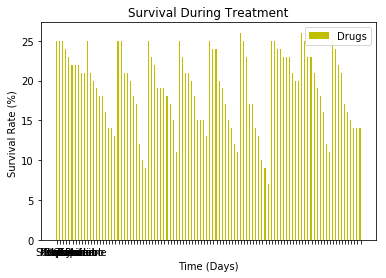

In [22]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
ind = np.arange(len(mean_survival_rates_data))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2,mean_survival_rates_data, width,
                label='Drugs' ,color = 'y')


# ax.errorbar(np.arange(len(mean_tumor_volume)), mean_tumor_volume, yerr=stderr_tumor_volume, fmt='o')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%) ")
ax.set_title('Survival During Treatment')
ax.set_xticks([value for value in ind])
ax.set_xticklabels(tuple(combined_df.Drug.unique()))
ax.legend()


plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)